###You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

###Here’s the dataset link:
### Your goal is to create a decision tree to predict whether a patient has diabetes based on the othervariables. Here are the steps you can follow:

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?

usp=sharing


###[Q1.] Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

#####[Ans]

In [1]:
## IMPORT LIBRARIERS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## LOAD THE DATASET
df = pd.read_csv("diabetes.csv")

In [4]:
## EXAMINE THE VARIABLES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


###[Q2.] Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

#####[Ans]

In [7]:
## REPLACE ALL MISSING VALUES IF PRESENT IN DATASET
df.fillna(df.median(), inplace=True)

In [8]:
## REMOVE OUTLIERS IF PRESENT IN DATASET
from scipy.stats import zscore
df = df[(np.abs(zscore(df)) < 3).all(axis=1)]

In [13]:
## NORMALIZE NUMERIC FEATURES
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop("Outcome", axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled["Outcome"] = df["Outcome"]

###[Q3.] Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

#####[Ans]

In [15]:
## SPLIT DATASET
from sklearn.model_selection import train_test_split
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###[Q4.] Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

#####[Ans]

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

## SET PARAMETER
parameter = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

## HHYPER PARAMTER TUNNING
tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree, parameter, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_

###[Q5.] Evaluate the performance of the decision tree model on the test set using metrics such as accuracy precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

#####[Ans]

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

y_pred = best_tree.predict(X_test)

## METRICES
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"ACCURACY : {accuracy}\nPRECISION : {precision}\nRECALL : {recall}\nF1 SCORE : {f1}\n")

ACCURACY : 0.7463768115942029
PRECISION : 0.7045454545454546
RECALL : 0.5849056603773585
F1 SCORE : 0.6391752577319587



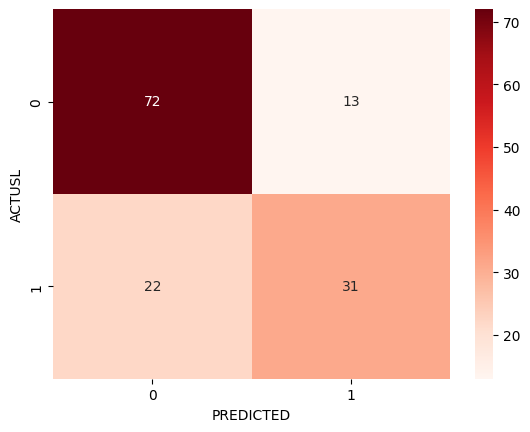

In [28]:
## CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("PREDICTED")
plt.ylabel("ACTUSL")
plt.show()

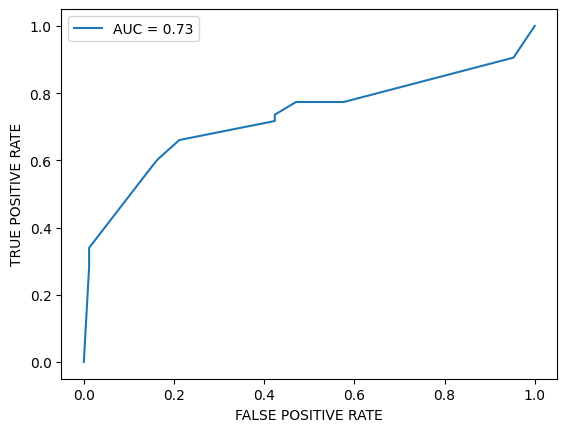

In [30]:
## ROC CURVE
y_prob = best_tree.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.legend()
plt.show()

###[Q6.] Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

#####[Ans]

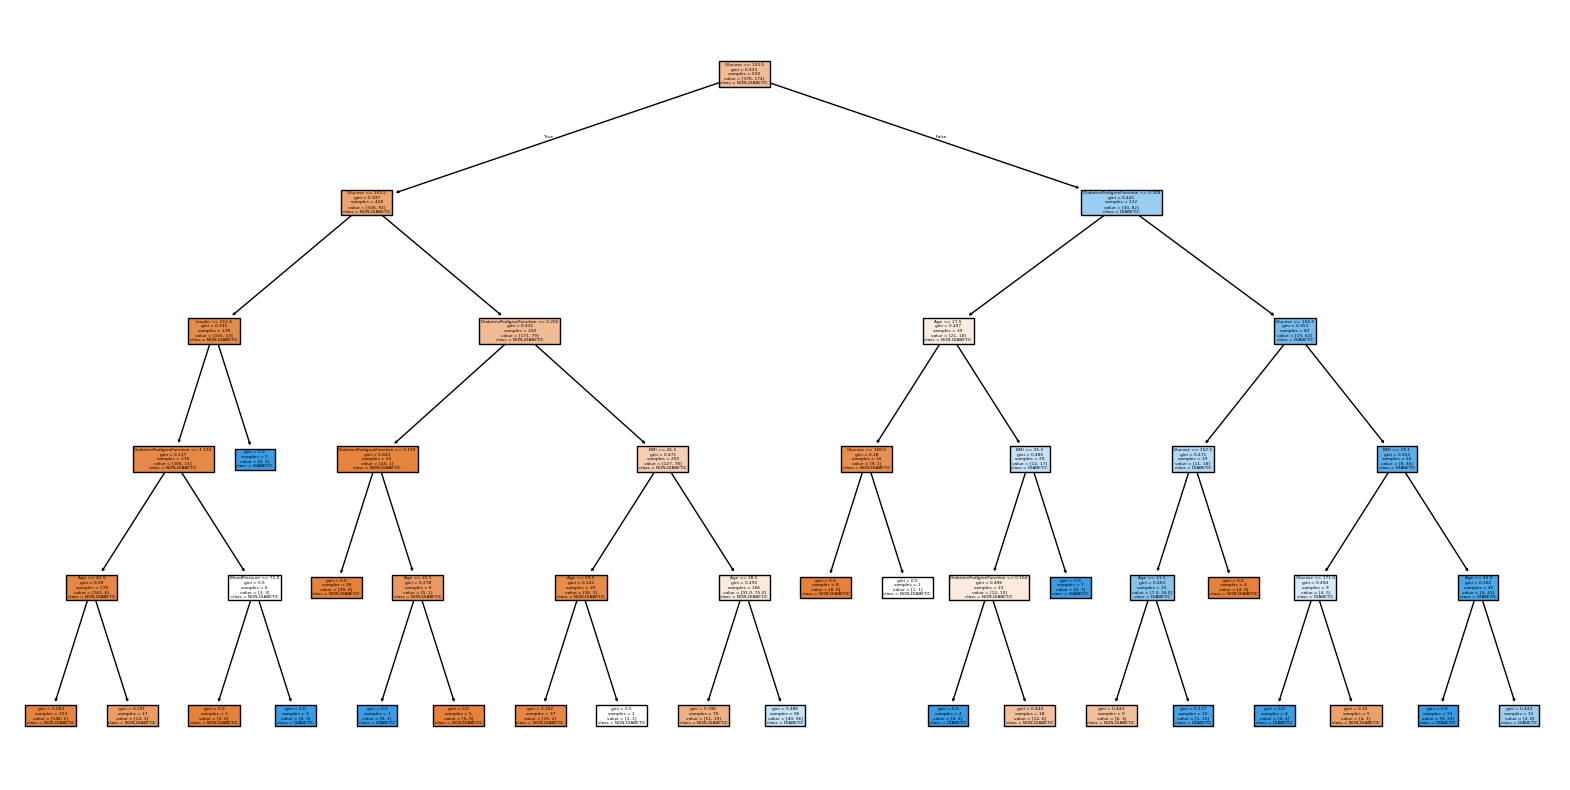

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=X.columns, class_names=["NON-DIABETIC", "DIABETIC"], filled=True)
plt.show()

Glucose                     0.500201
Age                         0.168429
DiabetesPedigreeFunction    0.164558
BMI                         0.113879
Insulin                     0.028412
BloodPressure               0.024521
Pregnancies                 0.000000
SkinThickness               0.000000
dtype: float64


<Axes: title={'center': 'FEATURE IMPORTANCE'}>

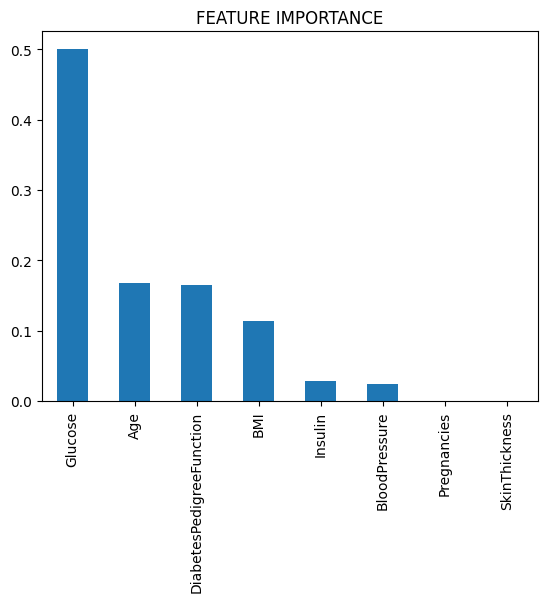

In [34]:
feature_importance = pd.Series(best_tree.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)
feature_importance.plot(kind="bar", title="FEATURE IMPORTANCE")

###[Q7.] Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

#####[Ans]

Steps:
1. Apply to New Data:

 - Use the model on unseen datasets or simulated data to validate performance.

2. Sensitivity Analysis:

 - Adjust thresholds for decision-making and analyze the impact on metrics like precision and recall.

3. Scenario Testing:

 - Test the model with extreme or edge-case data to check robustness.